In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
perf=pd.read_csv('StudentsPerformance.csv')
perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
perf

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [4]:
print(perf.nunique())

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     85
reading score                  72
writing score                  77
dtype: int64


1. Number of male and female students in the school

In [5]:
print(perf['gender'].value_counts())

female    518
male      482
Name: gender, dtype: int64


2. Average marks based on parents level of education

In [6]:
perf.groupby("parental level of education").mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.977477,71.018018,70.031532
bachelor's degree,69.288136,73.000000,73.381356
high school,61.821429,64.602041,62.403061
master's degree,70.254237,75.949153,75.677966
some college,67.128319,69.566372,69.035398
some high school,63.134078,66.759777,64.888268


In [7]:
perf.groupby("parental level of education").median()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.0,73.0,71.5
bachelor's degree,68.0,73.0,74.0
high school,63.0,66.0,64.0
master's degree,73.0,76.0,75.0
some college,68.0,71.0,70.0
some high school,65.0,67.0,66.0


3. Most marks scored students on the basis of gender and test preparation course

In [8]:
perf['avg']=perf[['math score','reading score','writing score']].mean(axis=1)
perf

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg
0,female,group C,some high school,free/reduced,none,0,17,10,9.000000
1,female,group B,high school,free/reduced,none,8,24,23,18.333333
2,female,group B,some high school,free/reduced,none,18,32,28,26.000000
3,female,group B,some college,standard,none,11,38,32,27.000000
4,female,group C,some college,free/reduced,none,22,39,33,31.333333
...,...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81,89.000000
996,male,group A,some college,standard,completed,100,96,86,94.000000
997,male,group D,some college,standard,completed,100,97,99,98.666667
998,male,group E,associate's degree,free/reduced,completed,100,100,93,97.666667


In [9]:
perf.groupby(['gender','test preparation course'])['avg'].max()

gender  test preparation course
female  completed                   99.666667
        none                       100.000000
male    completed                  100.000000
        none                        93.666667
Name: avg, dtype: float64

4. Score Variation of marks on the basis of gender and test preparation course

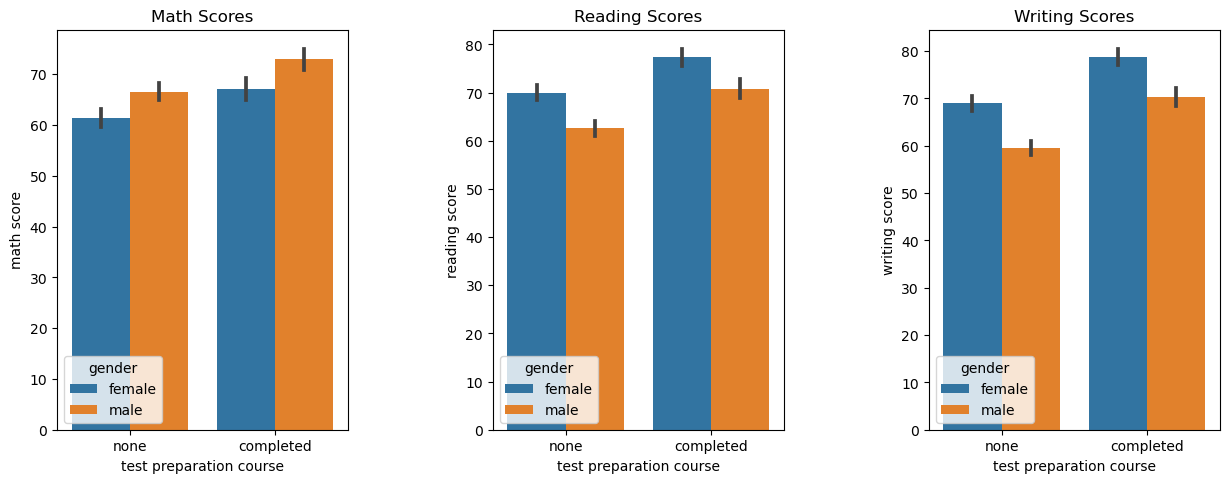

In [10]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(hue="gender", y="math score", x="test preparation course", data=perf)
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(hue="gender", y="reading score", x="test preparation course", data=perf)
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(hue="gender", y="writing score", x="test preparation course", data=perf)
plt.show()

5. Top 250 students(25%) on the basis of math score

In [11]:
perf.nlargest(250, ['math score'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg
515,female,group E,some college,standard,none,100,92,97,96.333333
516,female,group E,bachelor's degree,standard,none,100,100,100,100.000000
517,female,group E,associate's degree,standard,none,100,100,100,100.000000
996,male,group A,some college,standard,completed,100,96,86,94.000000
997,male,group D,some college,standard,completed,100,97,99,98.666667
...,...,...,...,...,...,...,...,...,...
428,female,group D,some college,free/reduced,none,77,86,86,83.000000
429,female,group E,some high school,standard,none,77,79,80,78.666667
849,male,group A,bachelor's degree,standard,none,77,67,68,70.666667
850,male,group C,associate's degree,free/reduced,none,77,67,64,69.333333
